/tmp/ipykernel_8731/1231448619.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = '19'+str(data['release_date'][i])[2:]


(463, 7)


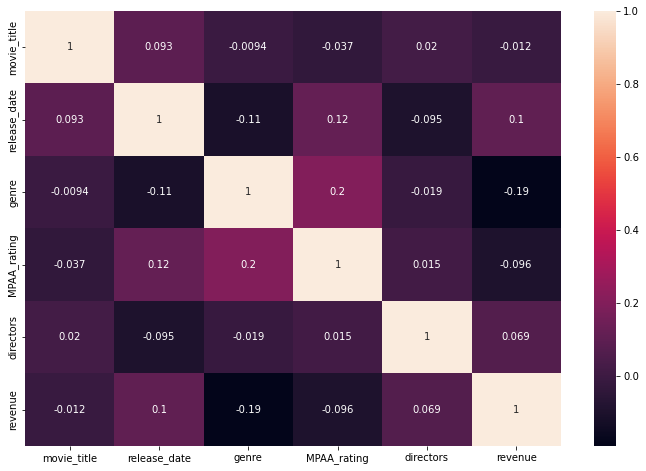

Mean Square Error Polynomial test =>  3.689420808656156e+16
Mean Square Error Polynomial train =>  1.4037351471287118e+16
############################################################################################
Mean Square Error ridge test =>  6.3756549341508424e+16
Mean Square Error ridge train => 3.769283037213966e+16


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets/[MERGED-COMPLETE]movies_revenue.csv')

#data cleaning
data.dropna(how='any',inplace=True)
# data.drop(data.index[data['directors'] == 'Unknown'],inplace=True)
data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")

data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].astype(str).str[0:4].astype("int32")

for i in range(0,data['release_date'].size):
    if data['release_date'][i] > 2022 :
        data['release_date'][i] = '19'+str(data['release_date'][i])[2:]

print(data.shape)
cols=('movie_title','genre','MPAA_rating','directors', 'animated')
data = Feature_Encoder(data,cols)

X = data.iloc[:,0:] #Features
Y=data['revenue'] #Label

# Feature Selection
# Get the correlation between the features
movie_data = data.iloc[:,:]
corr = movie_data.corr()


top_feature = corr.index[abs(corr['revenue']) > 0.009]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = movie_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)
X = X[top_feature]


#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)

poly_features = PolynomialFeatures(degree=3)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
prediction2 = poly_model.predict(poly_features.fit_transform(X_train))

print('Mean Square Error Polynomial test => ', metrics.mean_squared_error(y_test, prediction))
print('Mean Square Error Polynomial train => ', metrics.mean_squared_error(y_train, prediction2))
print("############################################################################################")


rdg = Ridge(alpha = 0.01 , normalize = True)
rdg.fit(X, Y)
prediction3 = rdg.predict(X_test)
print('Mean Square Error ridge test => ', metrics.mean_squared_error(y_test, prediction3))

prediction3 = rdg.predict(X_train)
print('Mean Square Error ridge train =>', metrics.mean_squared_error(y_train, prediction3))





In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


def Feature_Ordinal_Encoder(X,cols):
    for c in cols:
        ordi = OrdinalEncoder()
        ordi.fit(list(X[c].values))
        X[c] = ordi.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets/[MERGED-COMPLETE]movies_revenue.csv')

# cols = ('genre','MPAA_rating', 'animated')
# X = data['genre'] #Features

# enc = OrdinalEncoder()
# enc.fit(X)
# X = enc.transform(X)
# X
# drop columns
data.drop(data.index[data['directors']],axis=1,inplace=True)
#data cleaning
data.dropna(how='any',inplace=True)
# data.drop(data.index[data['directors'] == 'Unknown'],inplace=True)
# data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")

data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].astype(str).str[0:4].astype("int32")
data['year'] = data['release_date']

print(data['year'].max())
for i in range(0,data['release_date'].size):
    if data['year'][i] > 2022 :
        data['year'][i] = '19'+str(data['release_date'][i])[2:]


data['year'].max()

2071


/tmp/ipykernel_8731/3785487991.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][i] = '19'+str(data['release_date'][i])[2:]


2016